In [1]:
%%capture
!pip intall spacy --upgrade

In [3]:
%%capture
!python -m spacy download en_core_web_sm

In [4]:
%%capture 
!pip install goose3

In [18]:
from spacy import displacy
import spacy
from goose3 import Goose
print(spacy.__version__)

2.2.4


In [6]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
article = g.extract(url)
article

In [12]:
#article.links

In [13]:
#article.authors

In [10]:
article.title

'Natural language processing - Wikipedia'

In [7]:
article.cleaned_text

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpretation and generati

# Named Entity Recognition

In [14]:
nlp = spacy.load("en_core_web_sm")
nlp

In [15]:
doc = nlp(article.cleaned_text)

In [ ]:
for token in doc:
    print(token.text, " - " ,token.pos_)

In [ ]:
displacy.render(doc, style = "ent", jupyter = True)

In [21]:
for ent in doc.ents:
    if ent.label_ == "PERSON":
        print(ent.text)

Alan Turing
John Searle's
Joseph Weizenbaum
TaleSpin
Lehnert
Lehnert
Moore
Markov
George Lakoff
Lakoff


# Most Frequent Words

In [23]:
%%capture
import nltk 
nltk.download("punkt")

In [25]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)
print(tokens)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'The', 'goal', 'is', 'a', 'computer', 'capable', 'of', '``', 'understanding', "''", 'the', 'contents', 'of', 'documents', ',', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them', '.', 'The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves', '.', 'Natural', 'language', 'processing', 'has', 'its', 'roots', 'in', 'the', '1950s', '.', 'Already', 'in', '1950', ',', 'Alan', 'Turi

In [26]:
len(tokens)

2830

In [27]:
len([token.text for token in doc])

2898

In [33]:
frequency = nltk.FreqDist(tokens)
# ilk en çok kullanılan 50 kelime
most_common = frequency.most_common(n = 50)
print(most_common)

[(',', 176), ('the', 119), ('of', 112), ('.', 88), ('and', 49), ('a', 48), ('to', 47), ('in', 45), ('(', 42), (')', 42), ('[', 31), (']', 31), ('is', 28), ('language', 27), ('that', 23), ('NLP', 22), ('for', 21), ('systems', 19), ('on', 19), ('as', 18), ('e.g.', 18), ('natural', 17), ('machine', 17), ('learning', 17), ('with', 16), ('rules', 16), ('•', 16), ('statistical', 16), ('data', 15), ('by', 15), (':', 15), ('more', 15), ('processing', 14), ('The', 13), ('or', 13), ('``', 12), ('which', 12), ('input', 12), ('cognitive', 12), ('has', 11), ('translation', 11), ('be', 11), ('research', 11), ('are', 11), ('methods', 11), ('such', 11), ('”', 11), ("''", 10), ('can', 10), ('was', 10)]


In [30]:
dictonary = {}
for i in tokens:
    if i in dictonary:
        dictonary[i]+=1
    else:
        dictonary[i] = 1
dictonary == frequency

True

# Word Cloud

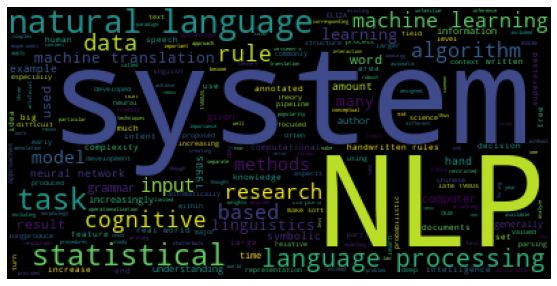

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

cloud = WordCloud()
cloud = cloud.generate(article.cleaned_text)

plt.figure(figsize = (10,5))
plt.imshow(cloud)
plt.axis("off")
plt.show()

# Preprocessing The Texts

In [44]:
def preprocessing(sentence):
    # a A 
    sentence = sentence.lower()
    # token.like_num -- > 10 ,50 ,1
    # token.is_punct -- > "!", ".", ","
    sentence = sentence.replace(".","")
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    tokens = " ".join([element for element in tokens])
    return tokens

In [45]:
article_cleaned = preprocessing(article.cleaned_text)
article_cleaned

'natural language processing nlp subfield linguistics computer science artificial intelligence concerned interactions computers human language particular program computers process analyze large amounts natural language data goal computer capable understanding contents documents including contextual nuances language technology accurately extract information insights contained documents categorize organize documents natural language processing roots 1950s alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence time articulated problem separate artificial intelligence proposed test includes task involves automated interpretation generation natural language premise symbolic nlp summarized john searle chinese room experiment given collection rules eg chinese phrasebook questions matching answers computer emulates natural language understanding nlp tasks applying rules data confronts 1950s georgetown experiment involved fully a

In [46]:
len(article_cleaned),len(article.cleaned_text)

(11297, 16063)

In [49]:
tokens = nltk.tokenize.word_tokenize(article_cleaned)
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common(20)
print(most_common)

[('[', 31), ('language', 29), ('learning', 23), ('nlp', 22), ('eg', 22), ('machine', 22), ('natural', 20), ('systems', 20), ('processing', 16), ('rules', 16), ('statistical', 16), ('data', 15), ('cognitive', 14), ('research', 13), ('based', 13), ('input', 12), ('tasks', 11), ('translation', 11), ('methods', 11), ('algorithms', 10)]


In [53]:
print(tokens[:10])

['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence']


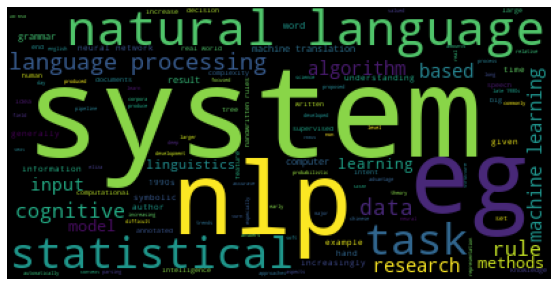

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

cloud = WordCloud()
cloud = cloud.generate(article_cleaned)

plt.figure(figsize = (10,5))
plt.imshow(cloud)
plt.axis("off")
plt.show()

# Text Summarization

In [58]:
%%capture
!pip install sumy

In [60]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.sum_basic import SumBasicSummarizer

In [59]:
article.cleaned_text

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpretation and generati

In [61]:
original_sentences = [sentence for sentence in nltk.sent_tokenize(article.cleaned_text)]
#original_sentences

In [68]:
len(original_sentences), 50 / 87

(89, 0.5747126436781609)

In [66]:
parser = PlaintextParser(article.cleaned_text, Tokenizer("english"))
parser

In [70]:
summarizer = SumBasicSummarizer()
summary = summarizer(parser.document,40)
len(summary)

40

In [72]:
summary[:2]

(<Sentence: The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.>,
 <Sentence: Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.>)

In [71]:
best_sentences = []
for sentence in summary:
    best_sentences.append(str(sentence))
    
best_sentences[:4]

['The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.',
 '• 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 'Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed.']

In [ ]:
from IPython.core.display import HTML
text = ""

display(HTML(f"<h1>Summary - {article.title}</h2>"))

for sentence in original_sentences:
    #print(sentence)
    if sentence in best_sentences:
        text+= " " + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
        text+= " " + sentence
        
display(HTML(f"""{text}"""))

# Keyword Search

In [74]:
string = 'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.'

In [88]:
search_strings = ["artificial","computer"]
tokens_list = [nlp(item) for item in search_strings]
tokens_list

[artificial, computer]

In [89]:
tokens_list

[artificial, computer]

In [90]:
from spacy.matcher import PhraseMatcher,Matcher

In [91]:
matcher = PhraseMatcher(nlp.vocab)
matcher.add("SEARCH",None,*tokens_list)

In [92]:
document = nlp(string)
matches = matcher(document)
matches

[(8661325627334373315, 12, 13), (8661325627334373315, 16, 17)]

In [97]:
for match_id,start,end in matches:
    string_id = nlp.vocab.strings[match_id]
    word = document[start-2:end+2]
    print(string_id,"-----",word )

SEARCH ----- linguistics, computer science,
SEARCH ----- , and artificial intelligence concerned


In [98]:
number_of_words = 50
search_strings_html = " ".join([element for element in search_strings])
search_strings_html

'artificial computer'

In [104]:
from warnings import filterwarnings
filterwarnings("ignore")

from IPython.core.display import HTML

number_of_words = 50
marked_text = ""
display(HTML(f"<h1>{search_strings_html.upper()}</h1>"))

document = nlp(article.cleaned_text)
matches = matcher(document)

display(HTML(f"""<p><strong>Number of Matches : </strong>{len(matches)}</p>"""))

for match_id,start,end in matches:
    start_ = start - number_of_words
    if start_ < 0:
        start_ = 0

    for j in range(len(tokens_list)):
        #print(j,tokens_list[j])
        if document[start:end].similarity(tokens_list[j]) == 1.0:
            search_text = str(tokens_list[j])
            marked_text +=str(document[start_:end + number_of_words]).replace(search_text, f"<mark>{search_text}</mark>")
            marked_text +="<br /><br /> "

display(HTML(f"""<blockquote>{marked_text}</blockquote>"""))      

# Bag Of Words

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [108]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(sentences)

In [122]:
pd.DataFrame(data = X.toarray(), columns = count_vec.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [127]:
original_sentences[:2]

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.']

In [128]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(original_sentences)
pd.DataFrame(data = X.toarray(), columns = count_vec.get_feature_names())

,10,100,11,12,13,14,15,16,17,18,19,1950,1950s,1954,1960s,1964,1966,1970s,1975,1976,1977,1978,1979,1980s,1981,1990s,1999,20,2000s,2002,2003,2006,2007,2009,2010s,2012,2015,2017,2018,2020,...,viewed,vocabularies,was,weakly,web,weights,weizenbaum,well,were,what,when,where,whereas,which,while,whose,why,wide,widespread,wilensky,will,with,within,without,word,words,work,worked,working,works,world,worlds,would,write,writing,written,year,years,you,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# TF-IDF

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [134]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(sentences)

pd.DataFrame(data = X.toarray(),columns = tfidf_vec.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [141]:
pd.DataFrame(data = tfidf_vec.idf_).T

,0,1,2,3,4,5,6,7,8
0,1.916291,1.223144,1.510826,1.0,1.916291,1.916291,1.0,1.916291,1.0


In [145]:
tfidf_vec = TfidfVectorizer()
X_sentences = tfidf_vec.fit_transform(original_sentences)

pd.DataFrame(data = X_sentences.toarray(),columns = tfidf_vec.get_feature_names())

,10,100,11,12,13,14,15,16,17,18,19,1950,1950s,1954,1960s,1964,1966,1970s,1975,1976,1977,1978,1979,1980s,1981,1990s,1999,20,2000s,2002,2003,2006,2007,2009,2010s,2012,2015,2017,2018,2020,...,viewed,vocabularies,was,weakly,web,weights,weizenbaum,well,were,what,when,where,whereas,which,while,whose,why,wide,widespread,wilensky,will,with,within,without,word,words,work,worked,working,works,world,worlds,would,write,writing,written,year,years,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111576,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.247623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.227981,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.451095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.112086,0.0,0.0,0.0,0.0,0.000000,0.0,0.168509,0.0,0.0,0.0,0.102889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000

# Cosine Similarity

In [147]:
X_sentences.shape

(89, 864)

In [150]:
X_sentences[0:3].toarray().shape

(3, 864)

In [151]:
X_test_similarity = X_sentences[0:3]
X_test_similarity = X_test_similarity.toarray()
type(X_test_similarity)

numpy.ndarray

In [154]:
X_test_similarity[0].shape,X_test_similarity.shape

((864,), (3, 864))

In [156]:
import numpy as np

X_test_similarity = np.concatenate((X_test_similarity,X_test_similarity[0].reshape(1,-1)),axis = 0)
X_test_similarity.shape

(4, 864)

In [182]:
X_test_similarity[0:2].shape

(2, 864)

In [160]:
# https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/cosine/

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X_test_similarity[0].reshape(1,-1),X_test_similarity[1].reshape(1,-1))

array([[0.13554591]])

In [161]:
cosine_similarity(X_test_similarity[1].reshape(1,-1),X_test_similarity[2].reshape(1,-1))

array([[0.16975569]])

In [162]:
original_sentences[1]

'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.'

In [164]:
original_sentences[2]

'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.'

In [166]:
# Both of Same array
cosine_similarity(X_test_similarity[0].reshape(1,-1),X_test_similarity[3].reshape(1,-1))

array([[1.]])

In [167]:
# Hepsi ile !!!
cosine_similarity(X_test_similarity[0].reshape(1,-1),X_test_similarity)

array([[1.        , 0.13554591, 0.06111703, 1.        ]])

# Simulating A ChatBot

In [ ]:
import random 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
welcome_words_input = ("hey","hello","hi")
welcome_words_output = ("hey","hello","hi","how are you ?","welcome","how are you doing?")

In [169]:
def welcome_message(text):

    for word in text.split():
        if word.lower() in welcome_words_input:
            return random.choice(welcome_words_output)

In [170]:
welcome_message("hey")

'how are you ?'

In [176]:
original_sentences = [sentence for sentence in nltk.sent_tokenize(article.cleaned_text)]
original_sentences[:2]

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.']

In [173]:
def preprocessing(sentence):
    # a A 
    sentence = sentence.lower()
    # token.like_num -- > 10 ,50 ,1
    # token.is_punct -- > "!", ".", ","
    sentence = sentence.replace(".","")
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    tokens = " ".join([element for element in tokens])
    return tokens

In [200]:
def answer(user_text,threshold = 0.3):

    cleaned_sentences = []
    for sentence in original_sentences:
        cleaned_sentences.append(preprocessing(sentence))

    chatbot_answer = ""
    user_text = preprocessing(user_text)
    cleaned_sentences.append(user_text)

    tfidf_vec = TfidfVectorizer()
    X_sentences = tfidf_vec.fit_transform(cleaned_sentences)
    similarity = cosine_similarity(X_sentences[-1],X_sentences)
    # Küçükten büyüğe doğru numaralar !!
    # -2 çünkü -1 seçersek kendisi oluyor 
    sentence_index = similarity.argsort()[0][-2]


    if similarity[0][sentence_index] < threshold:
        chatbot_answer += "Sorry, no answer was found!"
    else:
        chatbot_answer+= original_sentences[sentence_index]
    
    return chatbot_answer

In [201]:
answer("What is natural language processing?",0.3)

'Natural language processing has its roots in the 1950s.'

In [202]:
answer("Who is Alan Turing")

'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.'

In [203]:
answer("What is NLP?")

'[46] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit).'

In [205]:
cont = True
print("Hello! I am a chatbot and I will answer your questions about natural language preprocessing")
while cont:

    user_text = input()
    if user_text != "quit":
        if welcome_message(user_text) != None:
            print("Chatbot : " + welcome_message(user_text))
        else:
            print("Chatbot : ")
            print(answer(user_text))
    else:
        cont = False
        print("Chatbot : Bye! I will see you soon" )

Hello! I am a chatbot and I will answer your questions about natural language preprocessing
hi
Chatbot : how are you ?
"What is NLP?"
Chatbot : 
[46] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit).
quit
Chatbot : Bye! I will see you soon
